# Proyecto de Consultoría 
## Finanzas 202520
### Universidad de los Andes

Daniel Benavides

Estructurar un portafolio de inversión diversificado con compañías de distintos sectores económicos aplicando conceptos del curso de finanzas corporativas.

In [1]:
# Libraries

import numpy as np
import pandas as pd
import yfinance as yf

import altair as alt
import pandas as pd
from matplotlib.colors import to_hex
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

alt.data_transformers.enable('vegafusion')

from matplotlib import font_manager
plt.rcParams['font.family'] = 'Arial'

In [2]:
start = "2015-01-01"
end = "2025-01-01"

In [3]:
from fredapi import Fred
fred = Fred(api_key='a3d8a45391e92cc5c30c9c255819c138')

In [4]:
sofr = pd.DataFrame(fred.get_series('SOFR', observation_start=start, observation_end=end))
sofr  = sofr .dropna()
sofr.index.names = ['Date']
sofr.columns = ["SOFR"]
sofr["SOFR"] = sofr["SOFR"]

In [5]:
# Obtener datos de recesiones de FRED
recessions = fred.get_series('USREC', observation_start='2015-01-01')
recessions_df = pd.DataFrame(recessions, columns=['recession'])
recessions_df.index.names = ['Date']
recessions_df = recessions_df.reset_index()

recessions_df['recession_start'] = (recessions_df['recession'] == 1) & (recessions_df['recession'].shift(1) == 0)
recessions_df['recession_end'] = (recessions_df['recession'] == 0) & (recessions_df['recession'].shift(1) == 1)

recession_periods = []
start_date = None
for idx, row in recessions_df.iterrows():
    if row['recession_start']:
        start_date = row['Date']
    if row['recession_end'] and start_date is not None:
        recession_periods.append({'start': start_date, 'end': row['Date']})
        start_date = None

if start_date is not None:
    recession_periods.append({'start': start_date, 'end': recessions_df['Date'].iloc[-1]})

recession_bands = pd.DataFrame(recession_periods)

In [6]:
tickers = ["XOM", "CVX", "COP", "EOG", "OXY",
           "JNJ", "PFE", "MRK", "BMY", "ABBV",
           "AAPL", "SONY", "GRMN", "LOGI", "QCOM",
           "NKE", "ADDYY", "TPR", "VFC", "PVH"]

In [7]:
df = pd.DataFrame()

for symbol in tickers:
  df[symbol] =  yf.download(symbol, start)["Close"]

df.head()

C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_18316\1690921595.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[symbol] =  yf.download(symbol, start)["Close"]
[*********************100%***********************]  1 of 1 completed
C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_18316\1690921595.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[symbol] =  yf.download(symbol, start)["Close"]
[*********************100%***********************]  1 of 1 completed
C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_18316\1690921595.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[symbol] =  yf.download(symbol, start)["Close"]
[*********************100%***********************]  1 of 1 completed
C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_18316\1690921595.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[symbol] 

XOM        CVX        COP        EOG        OXY        JNJ  \
Date                                                                           
2015-01-02  57.916912  70.209557  48.290154  67.469154  58.248154  76.955574   
2015-01-05  56.332188  67.403152  45.991947  63.402328  56.088688  76.418076   
2015-01-06  56.032719  67.371979  44.093132  61.595600  55.612000  76.042580   
2015-01-07  56.600460  67.315826  44.387424  61.207977  55.619213  77.721291   
2015-01-08  57.542580  68.856232  45.494473  63.548584  56.110355  78.332390   

                  PFE        MRK        BMY       ABBV       AAPL      SONY  \
Date                                                                          
2015-01-02  18.688913  39.100754  41.793968  42.091423  24.237553  3.864588   
2015-01-05  18.587507  39.681892  41.140823  41.299297  23.554735  3.808199   
2015-01-06  18.742603  41.240730  41.070580  41.094891  23.556961  3.806319   
2015-01-07  18.999105  42.122707  41.604347  42.755795  23.887278  4.046916   
2015-01-08  19.386841  42.970490  42.643742  43.202957  24.805082  4.052556   

                 GRMN       LOGI       QCOM        NKE      ADDYY        TPR  \
Date                                                                           
2015-01-02  38.126144  10.823122  54.612591  41.381512  30.160566  27.043507   
2015-01-05  37.074738  10.945189  54.355263  40.715248  28.889807  26.623096   
2015-01-06  36.625175  10.758022  53.583260  40.475754  28.907578  26.311430   
2015-01-07  37.306770  10.758022  54.208221  41.311832  29.325239  27.123238   
2015-01-08  37.306770  10.912639  54.781689  42.265480  29.982840  27.811825   

                  VFC         PVH  
Date                               
2015-01-02  51.036469  124.319962  
2015-01-05  50.607487  119.960815  
2015-01-06  50.309952  115.109619  
2015-01-07  50.953449  118.051826  
2015-01-08  52.102036  117.185875

In [8]:
sector_map = {
    "Energía": ["XOM", "CVX", "COP", "EOG", "OXY"],
    "Salud": ["JNJ", "PFE", "MRK", "BMY", "ABBV"],
    "Tecnología": ["AAPL", "SONY", "GRMN", "LOGI", "QCOM"],
    "Ropa y Calzado": ["NKE", "ADDYY", "TPR", "VFC", "PVH"],
}

company_name_map = {
    'XOM': 'Exxon Mobil', 'CVX': 'Chevron', 'COP': 'ConocoPhillips',
    'EOG': 'EOG Resources', 'OXY': 'Occidental Petroleum',
    'JNJ': 'Johnson & Johnson', 'PFE': 'Pfizer', 'MRK': 'Merck & Co.',
    'BMY': 'Bristol-Myers Squibb', 'ABBV': 'AbbVie',
    'AAPL': 'Apple', 'SONY': 'Sony', 'GRMN': 'Garmin',
    'LOGI': 'Logitech', 'QCOM': 'Qualcomm',
    'NKE': 'Nike', 'ADDYY': 'Adidas', 'TPR': 'Tapestry',
    'VFC': 'VF Corporation', 'PVH': 'PVH Corp'
}


In [9]:
sector_colors = {
    "Energía":    cm.Blues,       # Azul
    "Salud":      cm.Greens,      # Verde
    "Tecnología": cm.Oranges,     # Naranja
    "Ropa y Calzado":       cm.Purples,     # Morado
}

def generate_shades(cmap, n):
    return [to_hex(cmap(0.4 + 0.5 * (i / max(n-1, 1)))) for i in range(n)]

company_colors = {}

for sector, tickers in sector_map.items():
    shades = generate_shades(sector_colors[sector], len(tickers))
    for ticker, color in zip(tickers, shades):
        # mapear al nombre completo
        company_colors[company_name_map[ticker]] = color

In [10]:
df_plot_prices = (
    df.reset_index()
    .melt(id_vars='Date', var_name='Company', value_name='Price')
)
df_plot_prices['Company'] = df_plot_prices['Company'].map({
    'XOM': 'Exxon Mobil',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'EOG': 'EOG Resources',
    'OXY': 'Occidental Petroleum',

    'JNJ': 'Johnson & Johnson',
    'PFE': 'Pfizer',
    'MRK': 'Merck & Co.',
    'BMY': 'Bristol-Myers Squibb',
    'ABBV': 'AbbVie',

    'AAPL': 'Apple',
    'SONY': 'Sony',
    'GRMN': 'Garmin',
    'LOGI': 'Logitech',
    'QCOM': 'Qualcomm',
    
    'NKE': 'Nike',
    'ADDYY': 'Adidas',
    'TPR': 'Tapestry',
    'VFC': 'VF Corporation',
    'PVH': 'PVH Corp'
})

In [11]:
color_scale = alt.Scale(
    domain=list(company_colors.keys()),
    range=list(company_colors.values())
)

In [12]:
def plot_sector_prices(sector_name, tickers):
    # Filtrar nombres completos del sector
    companies = [company_name_map[t] for t in tickers]

    # Filtrar dataframe
    df_sector = df_plot_prices[df_plot_prices['Company'].isin(companies)]

    # Valores finales para etiquetas
    final_values = (
        df_sector[df_sector['Date'] == df_sector['Date'].max()]
        .assign(label=lambda d: d['Price'].map(lambda x: f"{x:.2f}"))
    )

    # === NUEVO: color scale sectorial ===
    sector_color_scale = alt.Scale(
        domain=companies,
        range=[company_colors[c] for c in companies]
    )

    # Gráfica base
    lines = (
        alt.Chart(df_sector).mark_line(strokeWidth=2)
        .encode(
            x=alt.X('Date:T', title='Fecha'),
            y=alt.Y('Price:Q', title='Precio (USD)'),
            color=alt.Color(
                'Company:N',
                scale=sector_color_scale,
                title='Compañía',
                legend=alt.Legend(orient='right', titleFontSize=12, labelFontSize=11)
            )
        )
        .properties(
            width=800, height=450,
            title=f'Precios Históricos — Sector {sector_name}'
        )
    )

    # Recesiones
    try:
        recessions_df = fred.get_series('USREC', observation_start='2015-01-01')\
            .rename('recession').to_frame().reset_index().rename(columns={'index': 'Date'})
        recessions_df['start'] = (recessions_df['recession']==1)&(recessions_df['recession'].shift(1)==0)
        recessions_df['end']   = (recessions_df['recession']==0)&(recessions_df['recession'].shift(1)==1)

        periods, start = [], None
        for _, r in recessions_df.iterrows():
            if r['start']: start = r['Date']
            if r['end'] and start: periods.append({'start': start, 'end': r['Date']}); start = None
        if start: periods.append({'start': start, 'end': recessions_df['Date'].iloc[-1]})

        chart = (
            alt.Chart(pd.DataFrame(periods)).mark_rect(opacity=0.2, color='gray')
            .encode(x='start:T', x2='end:T')
            + lines
        ) if periods else lines

    except:
        chart = lines

    # Texto con colores correctos
    text = (
        alt.Chart(final_values).mark_text(align='left', dx=5, fontSize=11)
        .encode(
            x='Date:T',
            y='Price:Q',
            text='label:N',
            color=alt.Color(
                'Company:N',
                scale=sector_color_scale,
                legend=None
            )
        )
    )

    return (chart + text).configure_axis(
        labelFontSize=12,
        titleFontSize=14
    )

In [13]:
chart_energia = plot_sector_prices("Energía", sector_map["Energía"])
chart_salud = plot_sector_prices("Salud", sector_map["Salud"])
chart_tecnologia = plot_sector_prices("Tecnología", sector_map["Tecnología"])
chart_ropa = plot_sector_prices("Ropa y Calzado", sector_map["Ropa y Calzado"])

In [14]:
chart_energia

alt.LayerChart(...)

In [15]:
chart_salud

alt.LayerChart(...)

In [16]:
chart_ropa

alt.LayerChart(...)

In [17]:
chart_tecnologia

alt.LayerChart(...)

In [44]:
ret_simple_all = df.pct_change().dropna()
ret_mean_all = ret_simple_all.mean() * 252

for ticker, val in ret_mean_all.sort_values(ascending=False).items():
    company = company_name_map[ticker]
    print(f"{company:30s} ({ticker}): {val*100:6.2f}%")

Logitech                       (LOGI):  27.62%
Apple                          (AAPL):  26.76%
Sony                           (SONY):  22.97%
Tapestry                       (TPR):  22.37%
Garmin                         (GRMN):  19.10%
AbbVie                         (ABBV):  18.99%
Qualcomm                       (QCOM):  17.18%
Adidas                         (ADDYY):  15.90%
ConocoPhillips                 (COP):  13.00%
EOG Resources                  (EOG):  12.23%
Chevron                        (CVX):  11.42%
Merck & Co.                    (MRK):  11.33%
Johnson & Johnson              (JNJ):  10.67%
Exxon Mobil                    (XOM):  10.20%
Nike                           (NKE):   8.97%
Occidental Petroleum           (OXY):   8.65%
PVH Corp                       (PVH):   7.60%
Pfizer                         (PFE):   5.53%
Bristol-Myers Squibb           (BMY):   4.66%
VF Corporation                 (VFC):  -0.27%


Los retornos esperados anualizados revelan que el sector tecnológico domina el desempeño histórico, con Logitech liderando a 27.62% y Apple en segundo lugar con 26.76%. El sector farmacéutico muestra rendimientos más moderados pero consistentes, con AbbVie destacando a 18.99% mientras que las farmacéuticas tradicionales como JNJ, MRK y PFE oscilan entre 5.53% y 11.33%. VF Corporation presenta el único retorno negativo del portafolio (-0.27%), señalando desafíos estructurales en el segmento de ropa y calzado durante el período analizado.

In [20]:
cov_matrix_all = ret_simple_all.cov() * 252

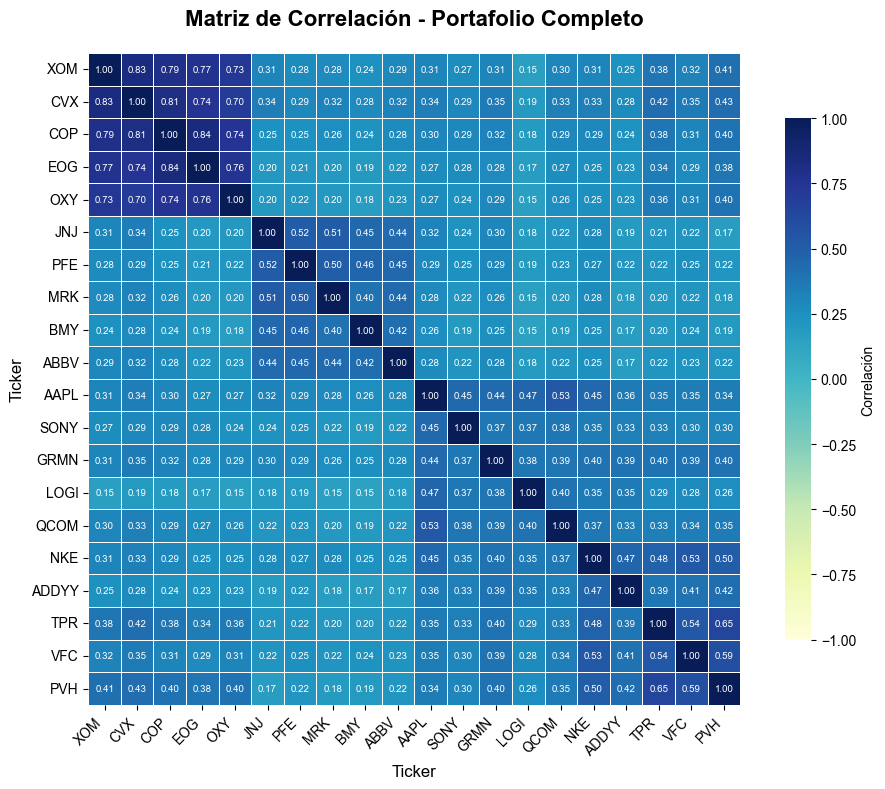

In [21]:
corr_matrix_all = ret_simple_all.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix_all,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlación"},
    annot_kws={"size": 7}
)

plt.title('Matriz de Correlación - Portafolio Completo', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ticker', fontsize=12)
plt.ylabel('Ticker', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [22]:
rf_rate = sofr["SOFR"].mean() / 100

In [23]:
tickers = ["XOM", "CVX", "COP", "EOG", "OXY",
           "JNJ", "PFE", "MRK", "BMY", "ABBV",
           "AAPL", "SONY", "GRMN", "LOGI", "QCOM",
           "NKE", "ADDYY", "TPR", "VFC", "PVH"]

In [24]:
vol_daily = ret_simple_all.std()
vol_annual = vol_daily * np.sqrt(252)

df_volatilidad = pd.DataFrame({
    'Volatilidad Diaria': vol_daily.apply(lambda x: f'{x*100:.2f}%'),
    'Volatilidad Anual': vol_annual.apply(lambda x: f'{x*100:.2f}%')
})

df_volatilidad.index.name = 'Ticker'
df_volatilidad['Compañía'] = df_volatilidad.index.map(company_name_map)
df_volatilidad = df_volatilidad[['Compañía'] + [col for col in df_volatilidad.columns if col != 'Compañía']]

# Identificar activo más y menos riesgoso
most_risky = df_volatilidad.loc[df_volatilidad['Volatilidad Anual'].idxmax(), 'Compañía']
least_risky = df_volatilidad.loc[df_volatilidad['Volatilidad Anual'].idxmin(), 'Compañía']

print(f"Activo más riesgoso: {most_risky}")
print(f"Activo menos riesgoso: {least_risky}")

df_volatilidad_sorted = df_volatilidad.sort_values('Volatilidad Anual', ascending=False)
print(df_volatilidad_sorted.to_string(float_format='%.4f'))

Activo más riesgoso: PVH Corp
Activo menos riesgoso: Johnson & Johnson
                    Compañía Volatilidad Diaria Volatilidad Anual
Ticker                                                           
PVH                 PVH Corp              2.97%            47.08%
OXY     Occidental Petroleum              2.96%            46.98%
VFC           VF Corporation              2.70%            42.91%
TPR                 Tapestry              2.70%            42.90%
EOG            EOG Resources              2.47%            39.13%
COP           ConocoPhillips              2.40%            38.04%
QCOM                Qualcomm              2.34%            37.07%
LOGI                Logitech              2.19%            34.82%
ADDYY                 Adidas              2.10%            33.29%
NKE                     Nike              1.94%            30.84%
SONY                    Sony              1.90%            30.18%
CVX                  Chevron              1.84%            29.22%
AAPL 

Johnson & Johnson confirma su posición como el activo más estable del portafolio con una volatilidad anual de 18.20%, reflejando su naturaleza defensiva y diversificación operativa en productos farmacéuticos, dispositivos médicos y consumo masivo. En contraste, PVH Corp y Occidental Petroleum presentan las volatilidades más elevadas (47.08% y 46.98% respectivamente), evidenciando su mayor sensibilidad a ciclos económicos y fluctuaciones en sus mercados específicos. El sector tecnológico muestra volatilidades intermedias entre 28% y 35%, balanceando potencial de crecimiento con riesgo moderado, mientras que las farmacéuticas tradicionales se concentran en el rango más bajo entre 18% y 26%.

## Portafolio de Mínima Varianza

In [38]:
from scipy.optimize import minimize

ret_mean_all = ret_simple_all.mean() * 252  
cov_matrix_all = ret_simple_all.cov() * 252 

rf_rate = sofr["SOFR"].mean() / 100

print(f"Tasa libre de riesgo (SOFR): {rf_rate*100:.4f}%")

Tasa libre de riesgo (SOFR): 2.3503%


In [26]:
def portfolio_variance(weights, cov_matrix):
    """Calcula la varianza del portafolio"""
    return np.dot(weights.T, np.dot(cov_matrix, weights))

def negative_sharpe(weights, ret_mean, cov_matrix, rf_rate):
    """Calcula el Sharpe Ratio negativo (para minimizar)"""
    port_return = np.dot(weights, ret_mean)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe = (port_return - rf_rate) / port_volatility
    return -sharpe

n_assets = len(tickers)
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
bounds = tuple((0, 1) for _ in range(n_assets))
initial_weights = np.array([1/n_assets] * n_assets)

In [27]:
result_min_var = minimize(
    portfolio_variance,
    initial_weights,
    args=(cov_matrix_all,),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

weights_min_var = result_min_var.x

# Métricas
ret_min_var = np.dot(weights_min_var, ret_mean_all)
vol_min_var = np.sqrt(portfolio_variance(weights_min_var, cov_matrix_all))
sharpe_min_var = (ret_min_var - rf_rate) / vol_min_var

print(f"Retorno Esperado Anual: {ret_min_var*100:.2f}%")
print(f"Volatilidad Anual: {vol_min_var*100:.2f}%")
print(f"Sharpe Ratio: {sharpe_min_var:.4f}")

Retorno Esperado Anual: 12.53%
Volatilidad Anual: 15.27%
Sharpe Ratio: 0.6662


El portafolio de mínima varianza logra reducir la volatilidad a 15.27%, significativamente por debajo de la volatilidad individual de cualquier activo excepto Johnson & Johnson, demostrando los beneficios de la diversificación. A pesar de su enfoque conservador, el portafolio genera un retorno esperado de 12.53% con un Sharpe Ratio de 0.6662, indicando una compensación eficiente por el riesgo asumido. Esta combinación de baja volatilidad y retorno moderado resulta de concentrar pesos en activos estables del sector salud, particularmente aquellos con volatilidades históricas inferiores al 26%.

In [28]:
df_weights_min_var = pd.DataFrame({
    'Ticker': tickers,
    'Compañía': [company_name_map[t] for t in tickers],
    'Peso (%)': weights_min_var * 100
}).sort_values('Peso (%)', ascending=False)

df_weights_min_var_display = df_weights_min_var.copy()
df_weights_min_var_display['Peso (%)'] = df_weights_min_var_display['Peso (%)'].apply(lambda x: f'{x:.2f}%')

df_weights_min_var_display

Ticker              Compañía Peso (%)
5     JNJ     Johnson & Johnson   39.01%
7     MRK           Merck & Co.   12.58%
0     XOM           Exxon Mobil    9.92%
8     BMY  Bristol-Myers Squibb    8.79%
11   SONY                  Sony    6.50%
13   LOGI              Logitech    5.68%
16  ADDYY                Adidas    5.39%
6     PFE                Pfizer    4.65%
12   GRMN                Garmin    3.86%
9    ABBV                AbbVie    2.57%
15    NKE                  Nike    0.93%
10   AAPL                 Apple    0.11%
18    VFC        VF Corporation    0.00%
17    TPR              Tapestry    0.00%
2     COP        ConocoPhillips    0.00%
14   QCOM              Qualcomm    0.00%
3     EOG         EOG Resources    0.00%
1     CVX               Chevron    0.00%
4     OXY  Occidental Petroleum    0.00%
19    PVH              PVH Corp    0.00%

## Portafolio de Máximo Sharpe Ratio

In [29]:
result_max_sharpe = minimize(
    negative_sharpe,
    initial_weights,
    args=(ret_mean_all, cov_matrix_all, rf_rate),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Pesos óptimos
weights_max_sharpe = result_max_sharpe.x

# Métricas
ret_max_sharpe = np.dot(weights_max_sharpe, ret_mean_all)
vol_max_sharpe = np.sqrt(portfolio_variance(weights_max_sharpe, cov_matrix_all))
sharpe_max_sharpe = (ret_max_sharpe - rf_rate) / vol_max_sharpe

print(f"Retorno Esperado Anual: {ret_max_sharpe*100:.2f}%")
print(f"Volatilidad Anual: {vol_max_sharpe*100:.2f}%")
print(f"Sharpe Ratio: {sharpe_max_sharpe:.4f}")

Retorno Esperado Anual: 23.48%
Volatilidad Anual: 20.54%
Sharpe Ratio: 1.0287


El portafolio de máximo Sharpe Ratio alcanza un retorno esperado de 23.48% con volatilidad de 20.54%, logrando un Sharpe Ratio excepcional de 1.0287 que supera significativamente al portafolio de mínima varianza (0.6662). Este resultado implica que el portafolio genera aproximadamente 1.03 unidades de exceso de retorno por cada unidad de riesgo asumido, demostrando eficiencia superior en la relación riesgo-retorno. El incremento de 10.95 puntos porcentuales en retorno respecto al portafolio de mínima varianza justifica ampliamente el aumento de solo 5.27 puntos porcentuales en volatilidad, reflejando una asignación óptima hacia activos de alto desempeño como tecnología.

In [30]:
df_weights_max_sharpe = pd.DataFrame({
    'Ticker': tickers,
    'Compañía': [company_name_map[t] for t in tickers],
    'Peso (%)': weights_max_sharpe * 100
}).sort_values('Peso (%)', ascending=False)

df_weights_max_sharpe_display = df_weights_max_sharpe.copy()
df_weights_max_sharpe_display['Peso (%)'] = df_weights_max_sharpe_display['Peso (%)'].apply(lambda x: f'{x:.2f}%')

df_weights_max_sharpe_display

Ticker              Compañía Peso (%)
10   AAPL                 Apple   30.03%
9    ABBV                AbbVie   26.75%
13   LOGI              Logitech   19.00%
11   SONY                  Sony   16.36%
12   GRMN                Garmin    4.43%
5     JNJ     Johnson & Johnson    2.21%
17    TPR              Tapestry    1.23%
6     PFE                Pfizer    0.00%
3     EOG         EOG Resources    0.00%
0     XOM           Exxon Mobil    0.00%
16  ADDYY                Adidas    0.00%
8     BMY  Bristol-Myers Squibb    0.00%
7     MRK           Merck & Co.    0.00%
4     OXY  Occidental Petroleum    0.00%
2     COP        ConocoPhillips    0.00%
1     CVX               Chevron    0.00%
15    NKE                  Nike    0.00%
14   QCOM              Qualcomm    0.00%
18    VFC        VF Corporation    0.00%
19    PVH              PVH Corp    0.00%

In [31]:
comparison_df = pd.DataFrame({
    'Mínima Varianza': [ret_min_var*100, vol_min_var*100, sharpe_min_var],
    'Máximo Sharpe': [ret_max_sharpe*100, vol_max_sharpe*100, sharpe_max_sharpe]
}, index=['Retorno Anual (%)', 'Volatilidad Anual (%)', 'Sharpe Ratio'])

comparison_df

Mínima Varianza  Máximo Sharpe
Retorno Anual (%)            12.526566      23.476530
Volatilidad Anual (%)        15.274073      20.536200
Sharpe Ratio                  0.666245       1.028732

## Asignación por sector

In [32]:
# Mapeo de ticker a sector
ticker_to_sector = {}
for sector, sector_tickers in sector_map.items():
    for ticker in sector_tickers:
        ticker_to_sector[ticker] = sector

# Calcular asignación por sector
def sector_allocation(weights, tickers_list, ticker_sector_map):
    sector_weights = {}
    for ticker, weight in zip(tickers_list, weights):
        sector = ticker_sector_map[ticker]
        if sector not in sector_weights:
            sector_weights[sector] = 0
        sector_weights[sector] += weight
    return sector_weights

sector_alloc_min_var = sector_allocation(weights_min_var, tickers, ticker_to_sector)
sector_alloc_max_sharpe = sector_allocation(weights_max_sharpe, tickers, ticker_to_sector)

sector_comparison = pd.DataFrame({
    'Mínima Varianza (%)': [sector_alloc_min_var.get(s, 0)*100 for s in ['Energía', 'Salud', 'Tecnología', 'Ropa y Calzado']],
    'Máximo Sharpe (%)': [sector_alloc_max_sharpe.get(s, 0)*100 for s in ['Energía', 'Salud', 'Tecnología', 'Ropa y Calzado']]
}, index=['Energía', 'Salud', 'Tecnología', 'Ropa y Calzado'])

sector_comparison

Mínima Varianza (%)  Máximo Sharpe (%)
Energía                    9.918339       1.399885e-14
Salud                     67.600607       2.896095e+01
Tecnología                16.157193       6.980704e+01
Ropa y Calzado             6.323861       1.232011e+00

El portafolio de mínima varianza se concentra fuertemente en el sector Salud con 67.60%, aprovechando la estabilidad y baja volatilidad de empresas farmacéuticas como Johnson & Johnson, mientras que Tecnología y Energía complementan con 16.16% y 9.92% respectivamente. En contraste, el portafolio de máximo Sharpe invierte esta proporción radicalmente, asignando 69.81% a Tecnología para capitalizar los altos retornos de Apple y Logitech, mientras reduce Salud a 28.96% y prácticamente elimina Energía (0.00%). Esta diferencia sectorial refleja el trade-off fundamental entre estabilidad defensiva y búsqueda de retornos superiores, donde el portafolio de mínima varianza prioriza sectores de bajo riesgo mientras que el de máximo Sharpe concentra en sectores de alto crecimiento histórico.

## Visualizaciones

### PieChart mínima varianza

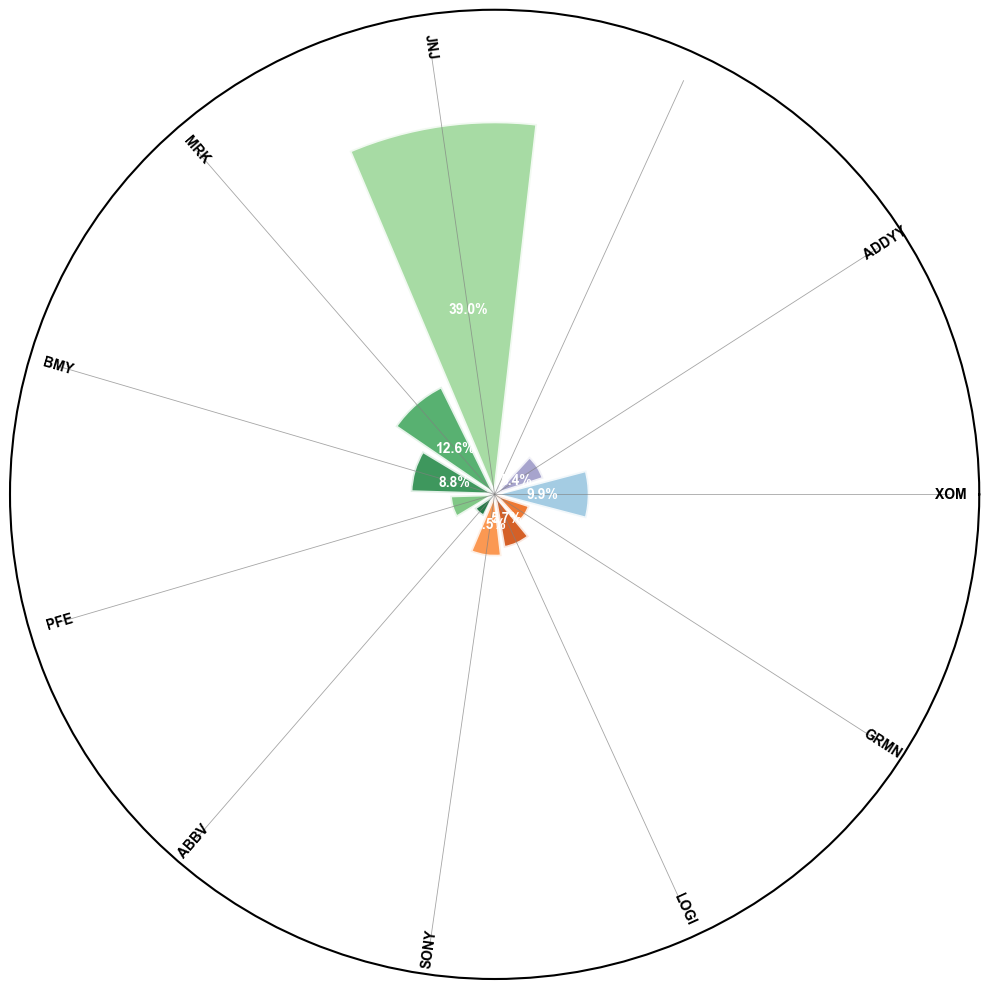

In [33]:
# Preparar datos
data_min_var = []
for ticker in tickers:
    weight = weights_min_var[tickers.index(ticker)] * 100
    if weight > 0.5:
        sector = ticker_to_sector[ticker]
        company = company_name_map[ticker]
        data_min_var.append({
            'Ticker': ticker,
            'Compañía': company,
            'Sector': sector,
            'Peso (%)': weight,
            'Color': company_colors[company]
        })

df_polar_min_var = pd.DataFrame(data_min_var).sort_values(['Sector', 'Peso (%)'], ascending=[True, False])

# Crear figura polar
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Calcular ángulos
n_bars = len(df_polar_min_var)
theta = np.linspace(0, 2 * np.pi, n_bars, endpoint=False)
width = 2 * np.pi / n_bars * 0.9

# Crear barras
bars = ax.bar(
    theta, 
    df_polar_min_var['Peso (%)'], 
    width=width, 
    bottom=0,
    color=df_polar_min_var['Color'],
    alpha=0.85,
    edgecolor='white',
    linewidth=2.5
)

# Remover etiquetas del perímetro y labels radiales
ax.set_xticks([])
ax.set_yticks([])

# Porcentajes dentro de las barras
for bar, value, angle, company in zip(
    bars,
    df_polar_min_var['Peso (%)'],
    theta,
    df_polar_min_var['Compañía']
):
    if value > 5:
        ax.text(
            angle,
            value / 2,
            f'{value:.1f}%',
            ha='center',
            va='center',
            fontsize=10,
            fontweight='bold',
            color='white'
        )

# -----------------------------------------------------------
# LÍNEAS SEPARADORAS ENTRE COMPAÑÍAS
# -----------------------------------------------------------
max_radius = max(df_polar_min_var['Peso (%)'])

for angle in theta:
    ax.plot(
        [angle, angle],
        [0, max_radius * 1.22],
        color='gray',
        linewidth=0.6,
        alpha=0.7
    )

# -----------------------------------------------------------
# TICKERS POR FUERA DEL CÍRCULO
# -----------------------------------------------------------
radius_outer = max_radius * 1.18

for angle, ticker, value in zip(theta, df_polar_min_var['Ticker'], df_polar_min_var['Peso (%)']):
    if value > 2:

        if 0 <= angle < np.pi/2 or 3*np.pi/2 <= angle <= 2*np.pi:
            ha = 'left'
            rotation = np.degrees(angle)
        else:
            ha = 'right'
            rotation = np.degrees(angle) + 180

        ax.text(
            angle,
            radius_outer,
            ticker,   # ← ahora mostramos los tickers
            ha=ha,
            va='center',
            fontsize=10,
            fontweight='bold',
            rotation=rotation,
            rotation_mode='anchor'
        )

# Configuración final
ax.set_ylim(0, max_radius * 1.3)
ax.grid(False)

ax.spines['polar'].set_visible(True)
ax.spines['polar'].set_edgecolor('black')
ax.spines['polar'].set_linewidth(1.5)

plt.tight_layout()
plt.show()


### PieChart máximo Sharpe

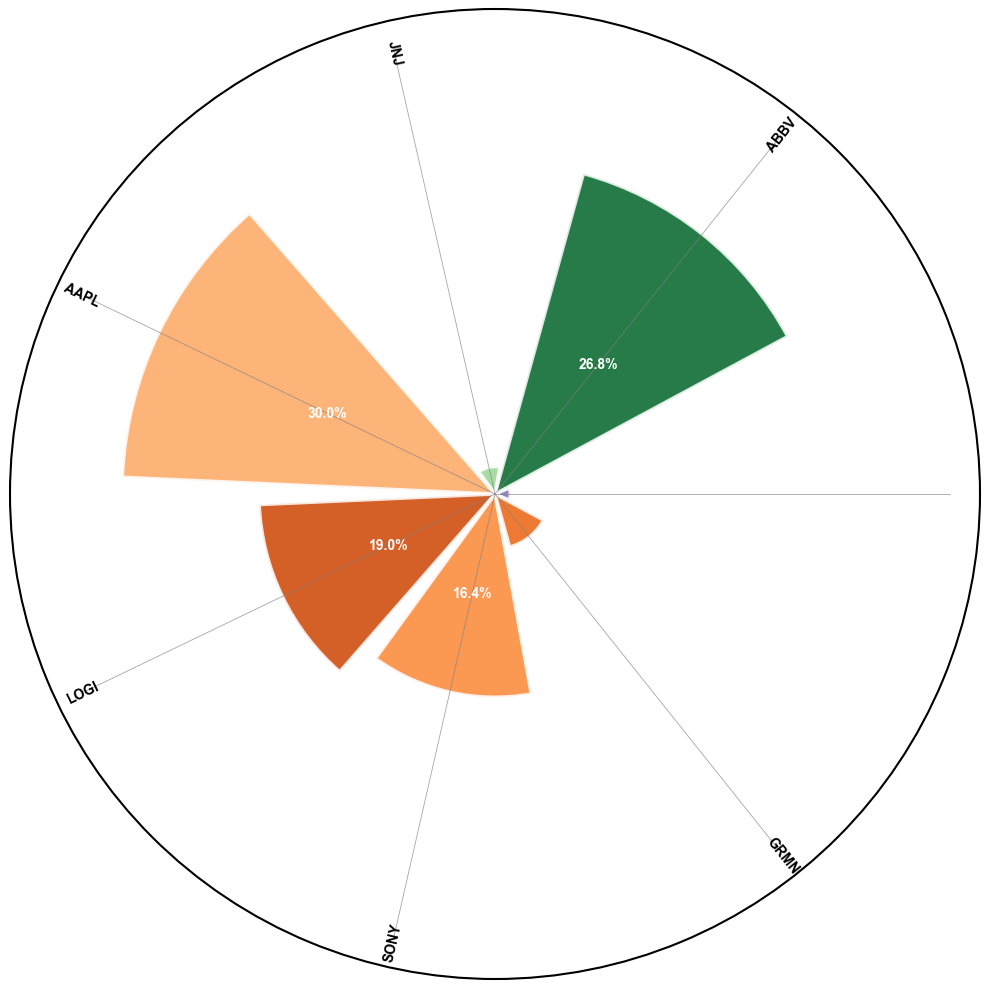

In [34]:
# Preparar datos
data_max_sharpe = []
for ticker in tickers:
    weight = weights_max_sharpe[tickers.index(ticker)] * 100
    if weight > 0.5:
        sector = ticker_to_sector[ticker]
        company = company_name_map[ticker]
        data_max_sharpe.append({
            'Ticker': ticker,
            'Compañía': company,
            'Sector': sector,
            'Peso (%)': weight,
            'Color': company_colors[company]
        })

df_polar_max_sharpe = pd.DataFrame(data_max_sharpe).sort_values(['Sector', 'Peso (%)'], ascending=[True, False])

# Crear figura polar
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Calcular ángulos
n_bars = len(df_polar_max_sharpe)
theta = np.linspace(0, 2 * np.pi, n_bars, endpoint=False)
width = 2 * np.pi / n_bars * 0.9

# Crear barras
bars = ax.bar(
    theta, 
    df_polar_max_sharpe['Peso (%)'], 
    width=width, 
    bottom=0,
    color=df_polar_max_sharpe['Color'],
    alpha=0.85,
    edgecolor='white',
    linewidth=2.5
)

# Remover etiquetas del perímetro y labels radiales
ax.set_xticks([])
ax.set_yticks([])

# Porcentajes dentro de las barras
for bar, value, angle, company in zip(
    bars,
    df_polar_max_sharpe['Peso (%)'],
    theta,
    df_polar_max_sharpe['Compañía']
):
    if value > 5:
        ax.text(
            angle,
            value / 2,
            f'{value:.1f}%',
            ha='center',
            va='center',
            fontsize=10,
            fontweight='bold',
            color='white'
        )

# -----------------------------------------------------------
# LÍNEAS SEPARADORAS ENTRE COMPAÑÍAS
# -----------------------------------------------------------
max_radius = max(df_polar_max_sharpe['Peso (%)'])
for angle in theta:
    ax.plot(
        [angle, angle],
        [0, max_radius * 1.22],
        color='gray',
        linewidth=0.6,
        alpha=0.7
    )

# -----------------------------------------------------------
# TICKERS POR FUERA DEL CÍRCULO
# -----------------------------------------------------------
radius_outer = max_radius * 1.18
for angle, ticker, value in zip(theta, df_polar_max_sharpe['Ticker'], df_polar_max_sharpe['Peso (%)']):
    if value > 2:
        if 0 <= angle < np.pi/2 or 3*np.pi/2 <= angle <= 2*np.pi:
            ha = 'left'
            rotation = np.degrees(angle)
        else:
            ha = 'right'
            rotation = np.degrees(angle) + 180
        
        ax.text(
            angle,
            radius_outer,
            ticker,
            ha=ha,
            va='center',
            fontsize=10,
            fontweight='bold',
            rotation=rotation,
            rotation_mode='anchor'
        )

# Configuración final
ax.set_ylim(0, max_radius * 1.3)
ax.grid(False)
ax.spines['polar'].set_visible(True)
ax.spines['polar'].set_edgecolor('black')
ax.spines['polar'].set_linewidth(1.5)

plt.tight_layout()
plt.show()

### Frontera Eficiente

In [45]:
# Calcular frontera eficiente
def calcular_frontera_eficiente(ret_mean, cov_matrix, rf_rate, n_points=100):
    """Calcula portafolios óptimos para diferentes niveles de retorno objetivo"""
    
    # Función objetivo: minimizar varianza
    def portfolio_variance_obj(weights):
        return np.dot(weights.T, np.dot(cov_matrix, weights))
    
    # Restricciones
    n_assets = len(ret_mean)
    bounds = tuple((0, 1) for _ in range(n_assets))
    
    # Rango de retornos objetivo
    ret_min = min(ret_mean)
    ret_max = max(ret_mean)
    target_returns = np.linspace(ret_min, ret_max, n_points)
    
    frontier_results = []
    
    for target_ret in target_returns:
        # Restricciones: suma de pesos = 1 y retorno = target
        constraints = [
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
            {'type': 'eq', 'fun': lambda x: np.dot(x, ret_mean) - target_ret}
        ]
        
        initial_weights = np.array([1/n_assets] * n_assets)
        
        result = minimize(
            portfolio_variance_obj,
            initial_weights,
            method='SLSQP',
            bounds=bounds,
            constraints=constraints
        )
        
        if result.success:
            ret = np.dot(result.x, ret_mean)
            vol = np.sqrt(portfolio_variance_obj(result.x))
            sharpe = (ret - rf_rate) / vol
            
            frontier_results.append({
                'Retorno': ret * 100,
                'Volatilidad': vol * 100,
                'Sharpe Ratio': sharpe
            })
    
    return pd.DataFrame(frontier_results)

# Calcular la frontera
df_frontera = calcular_frontera_eficiente(ret_mean_all, cov_matrix_all, rf_rate, n_points=50)

In [36]:
np.random.seed(42)
num_portfolios_viz = 10000

simulated_portfolios = []
for _ in range(num_portfolios_viz):
    weights = np.random.random(len(tickers))
    weights = weights / np.sum(weights)
    
    port_return = np.dot(weights, ret_mean_all) * 100
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_all, weights))) * 100
    sharpe_ratio = (port_return/100 - rf_rate) / (port_volatility/100)
    
    simulated_portfolios.append({
        'Retorno': port_return,
        'Volatilidad': port_volatility,
        'Sharpe Ratio': sharpe_ratio
    })

df_simulados = pd.DataFrame(simulated_portfolios)

In [37]:
# Nube de portafolios simulados
scatter_simulados = alt.Chart(df_simulados).mark_circle(
    size=30,
    opacity=0.6
).encode(
    x=alt.X('Volatilidad:Q', title='Volatilidad Anual (%)', scale=alt.Scale(zero=False)),
    y=alt.Y('Retorno:Q', title='Retorno Anual (%)', scale=alt.Scale(zero=False)),
    color=alt.Color('Sharpe Ratio:Q', 
                    scale=alt.Scale(scheme='viridis'),
                    legend=alt.Legend(title='Sharpe Ratio')),
    tooltip=[
        alt.Tooltip('Volatilidad:Q', format='.2f', title='Volatilidad (%)'),
        alt.Tooltip('Retorno:Q', format='.2f', title='Retorno (%)'),
        alt.Tooltip('Sharpe Ratio:Q', format='.4f')
    ]
)

# Portafolios óptimos
portafolios_optimos = pd.DataFrame({
    'Retorno': [ret_min_var * 100, ret_max_sharpe * 100],
    'Volatilidad': [vol_min_var * 100, vol_max_sharpe * 100],
    'Tipo': ['Mínima Varianza', 'Máximo Sharpe']
})

portafolios_points = alt.Chart(portafolios_optimos).mark_point(
    size=400,
    filled=True,
    stroke='black',
    strokeWidth=2
).encode(
    x='Volatilidad:Q',
    y='Retorno:Q',
    color=alt.Color('Tipo:N', 
                    scale=alt.Scale(domain=['Mínima Varianza', 'Máximo Sharpe'],
                                   range=['#5B8DBE', '#D85C5C']),
                    legend=alt.Legend(title='Portafolio Óptimo')),
    tooltip=[
        alt.Tooltip('Tipo:N', title='Portafolio'),
        alt.Tooltip('Volatilidad:Q', format='.2f', title='Volatilidad (%)'),
        alt.Tooltip('Retorno:Q', format='.2f', title='Retorno (%)')
    ]
)

# Etiquetas
portafolios_text = alt.Chart(portafolios_optimos).mark_text(
    align='left',
    dx=10,
    dy=-10,
    fontSize=11,
    fontWeight='bold'
).encode(
    x='Volatilidad:Q',
    y='Retorno:Q',
    text='Tipo:N',
    color=alt.value('black')
)

# Combinar (sin frontera_line)
chart_frontera = (scatter_simulados + portafolios_points + portafolios_text).properties(
    width=800,
    height=600,
    title='Frontera Eficiente - Portafolio Diversificado'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16,
    fontWeight='bold'
)

chart_frontera

alt.LayerChart(...)

La simulación de Monte Carlo con 10,000 portafolios aleatorios visualiza el espacio completo de combinaciones posibles entre los 20 activos, revelando que la gran mayoría de portafolios no optimizados generan retornos entre 11% y 17% con volatilidades de 17% a 24%. 